Importar los datos

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno


In [5]:
# importing data
df =pd.read_csv("/content/drive/MyDrive/cursos/ML/trabajo_final/bike_rentals_hours.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
df=df.set_index('instant')

In [7]:
df=df.drop('dteday',axis=1)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.1 MB


In [9]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


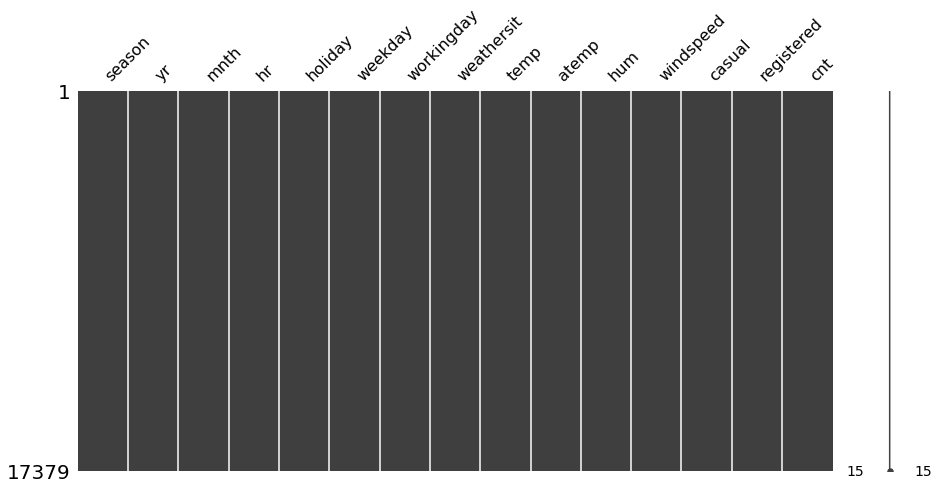

In [10]:
msno.matrix(df,figsize=(15,7))

In [11]:
df.isna().sum()
#no hay valores null

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

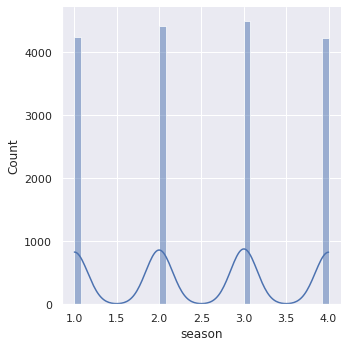

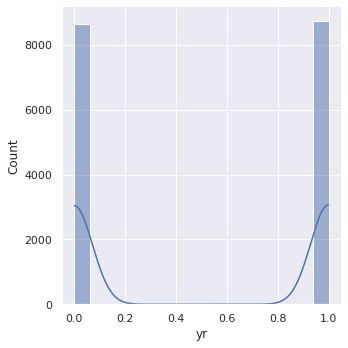

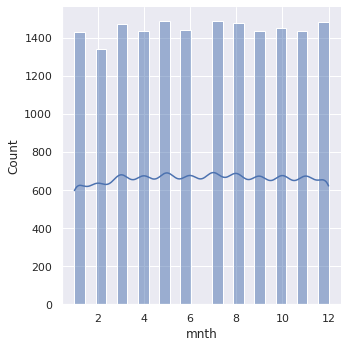

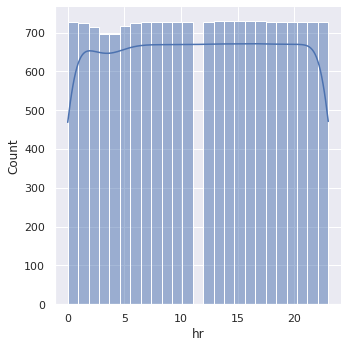

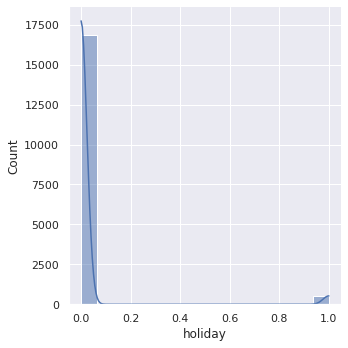

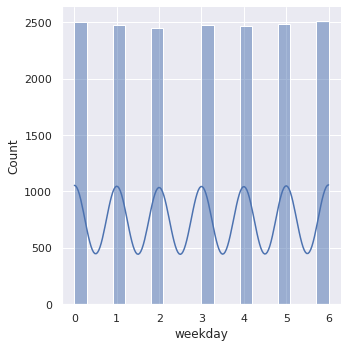

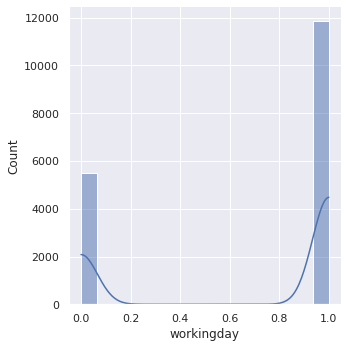

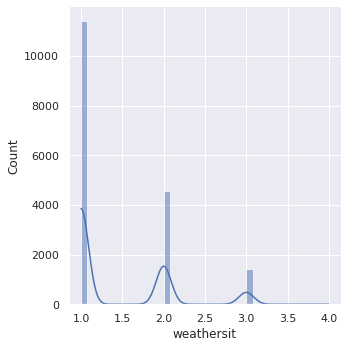

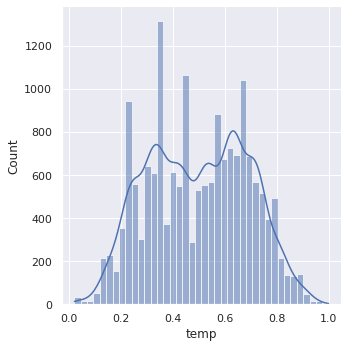

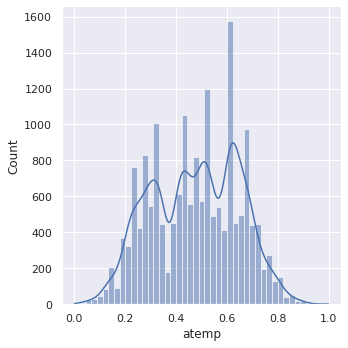

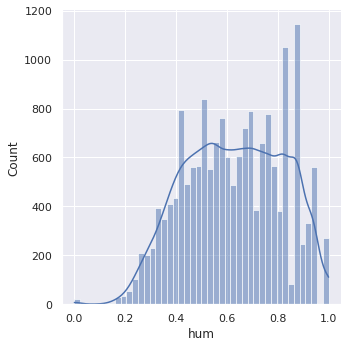

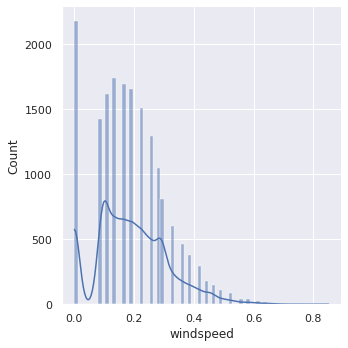

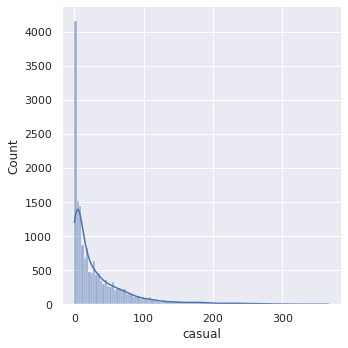

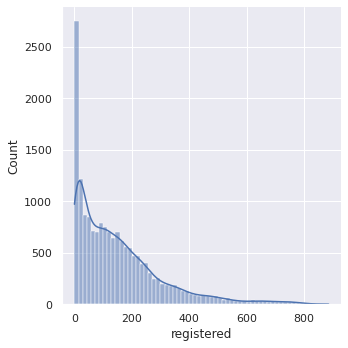

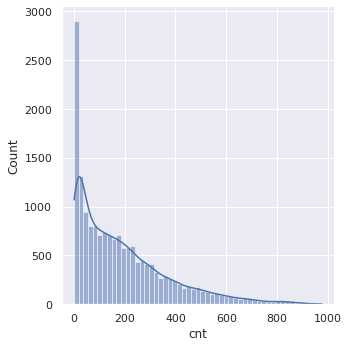

In [12]:
for i in df.columns:    
    sns.set_theme(style="darkgrid")
    ax=sns.displot(df, x=i, kde=True)

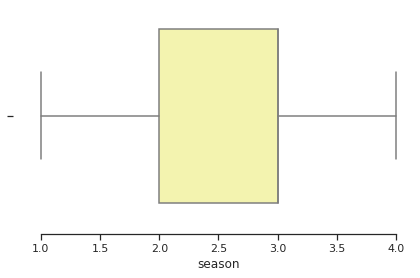

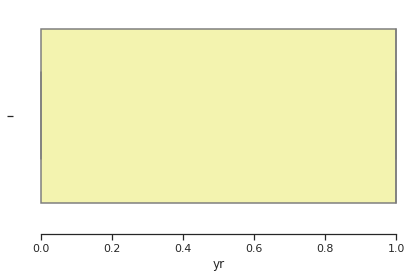

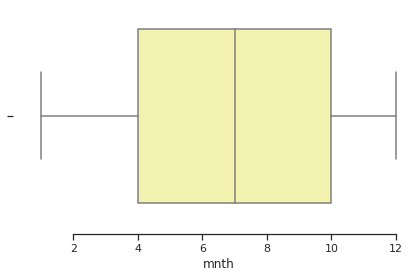

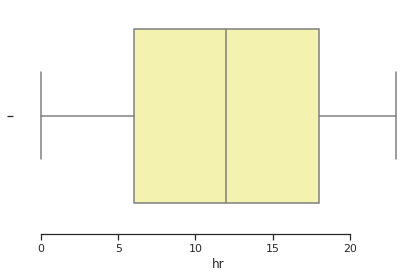

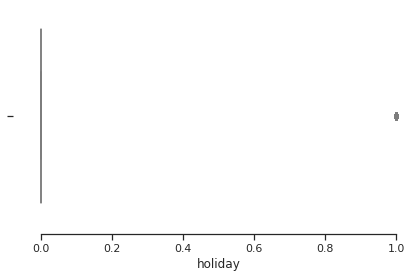

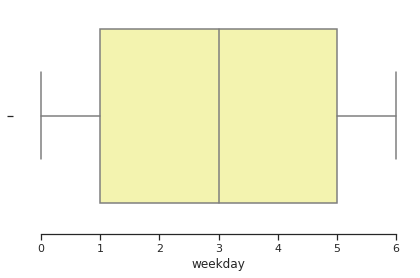

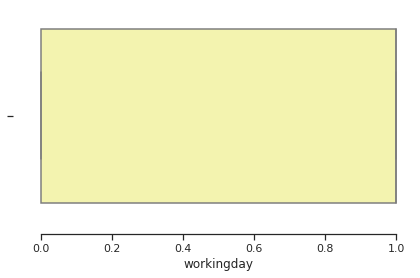

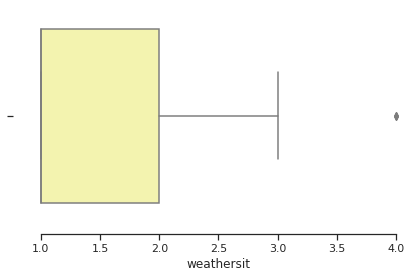

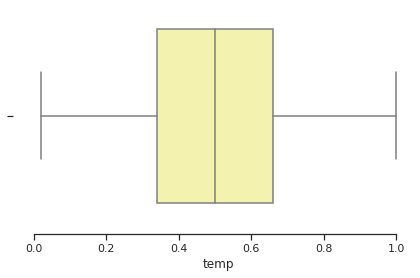

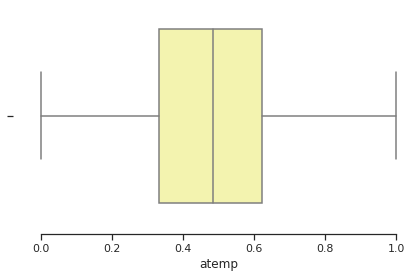

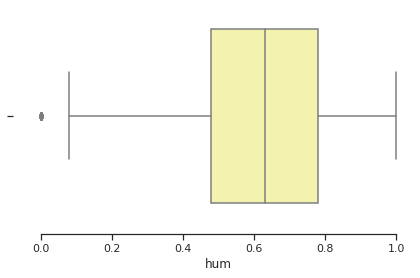

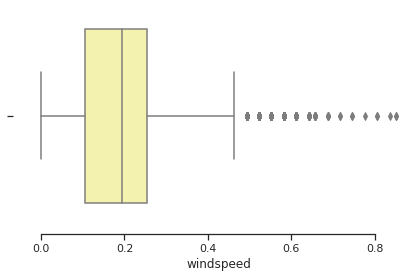

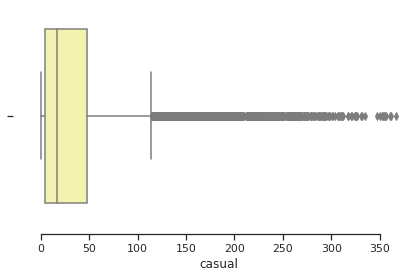

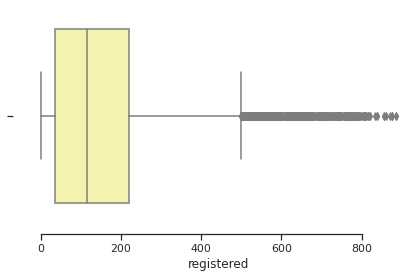

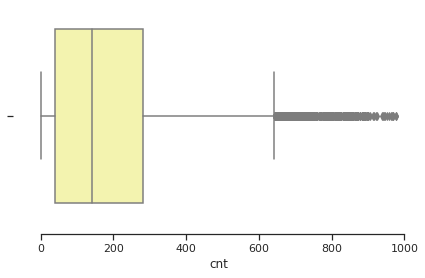

In [13]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

for i in df.columns:
    fig, ax = plt.subplots(figsize=(7, 4))
    sns.boxplot(x=i,palette=["y", "b"],data=df)
    sns.despine(offset=10, trim=True)
    plt.show()

In [14]:
#count of outliers in different columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [15]:
#count of outliers in different columns

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

season           0
yr               0
mnth             0
hr               0
holiday        500
weekday          0
workingday       0
weathersit       3
temp             0
atemp            0
hum             22
windspeed      342
casual        1192
registered     680
cnt            505
dtype: int64

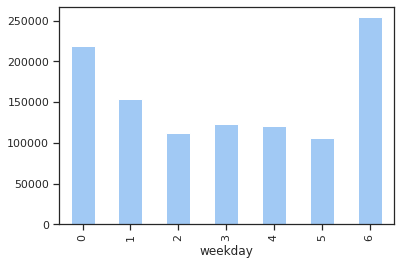

In [16]:
outliers.groupby("weekday").sum()['cnt'].plot(kind='bar')

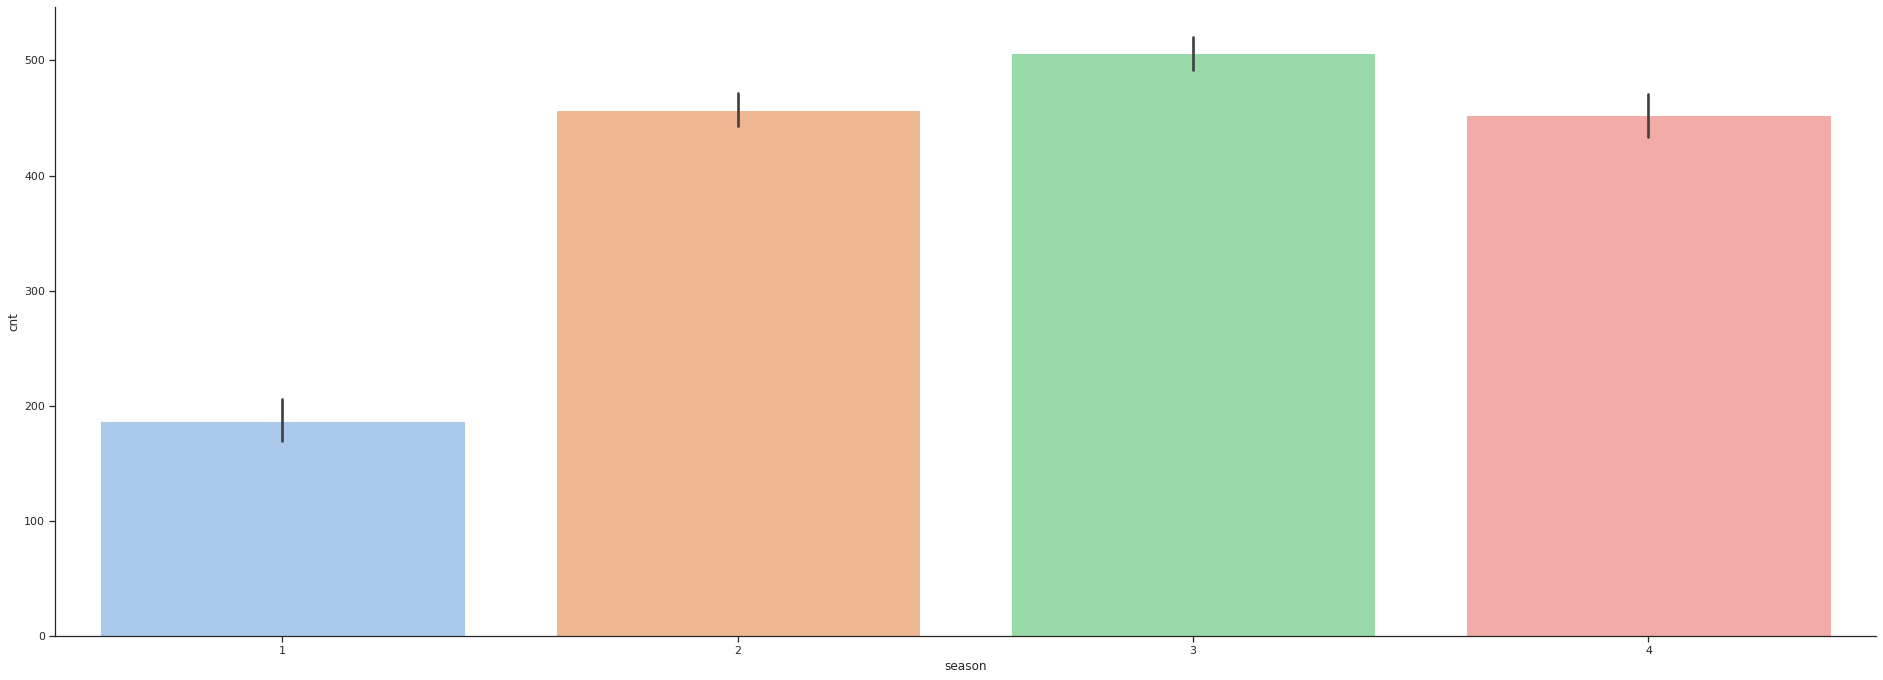

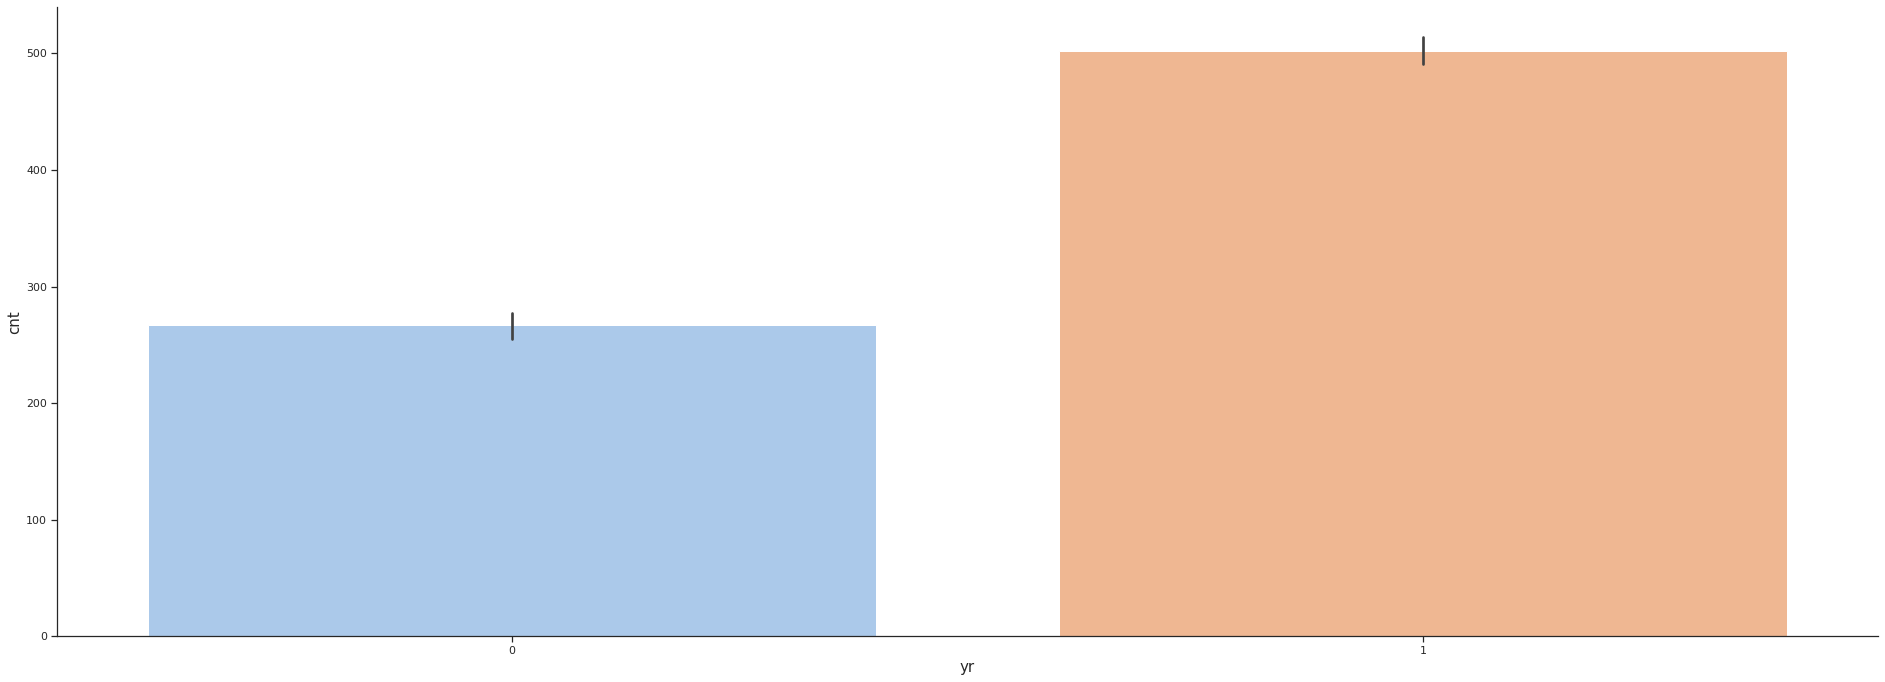

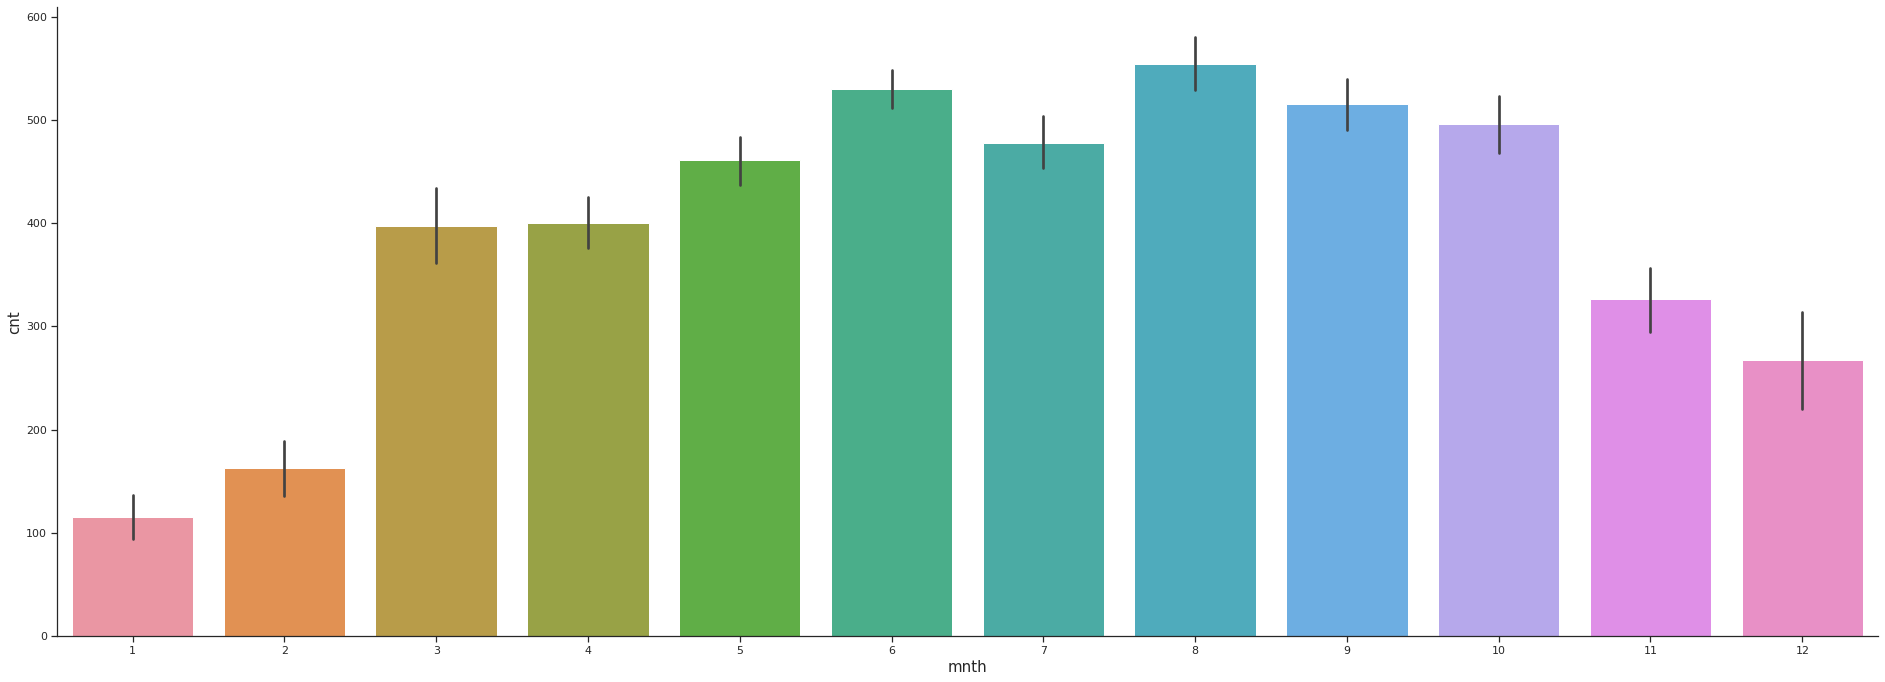

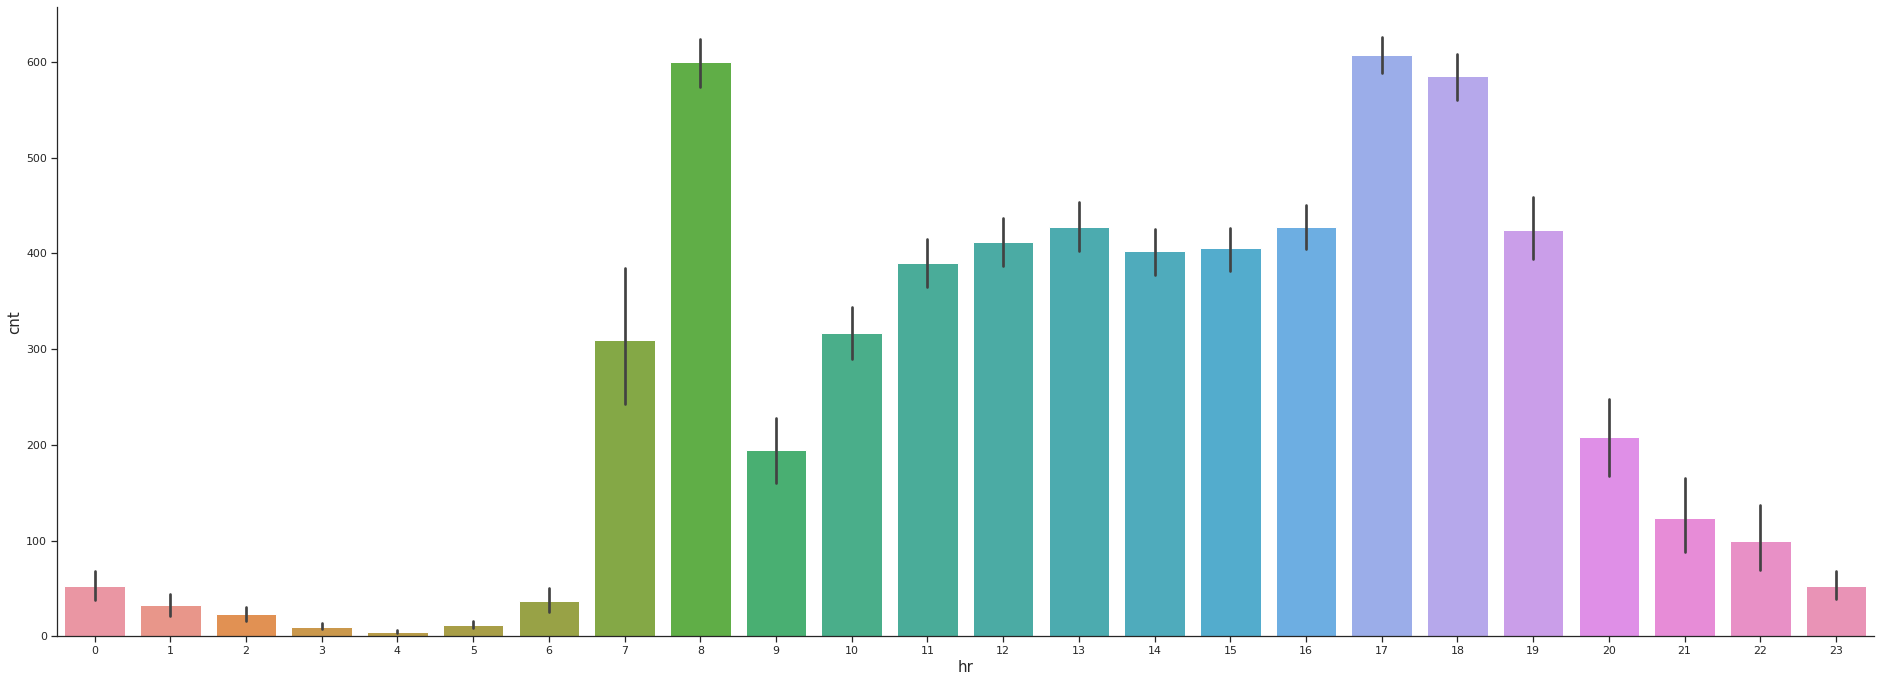

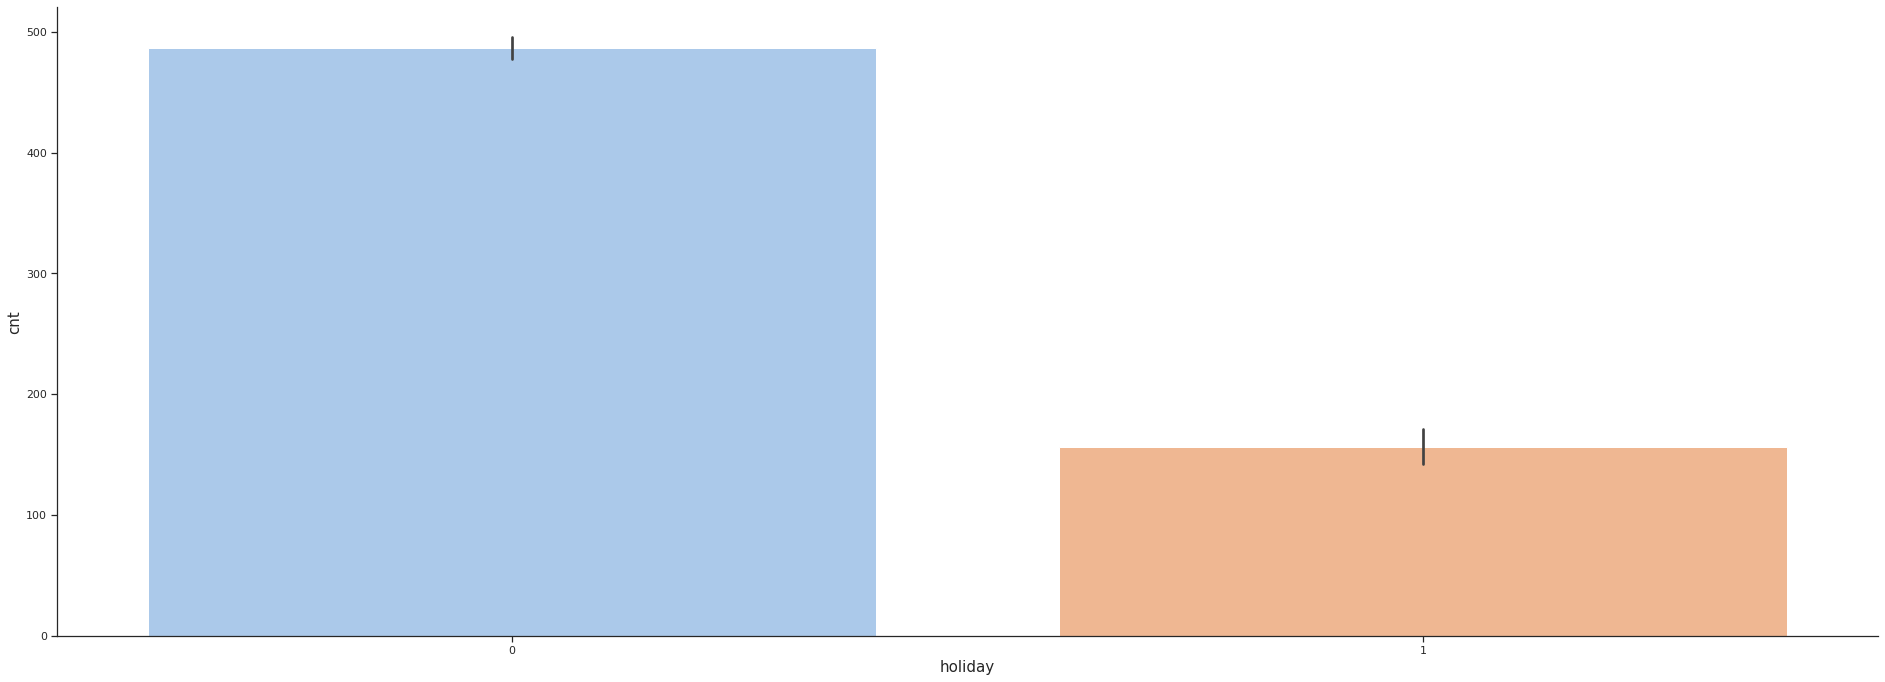

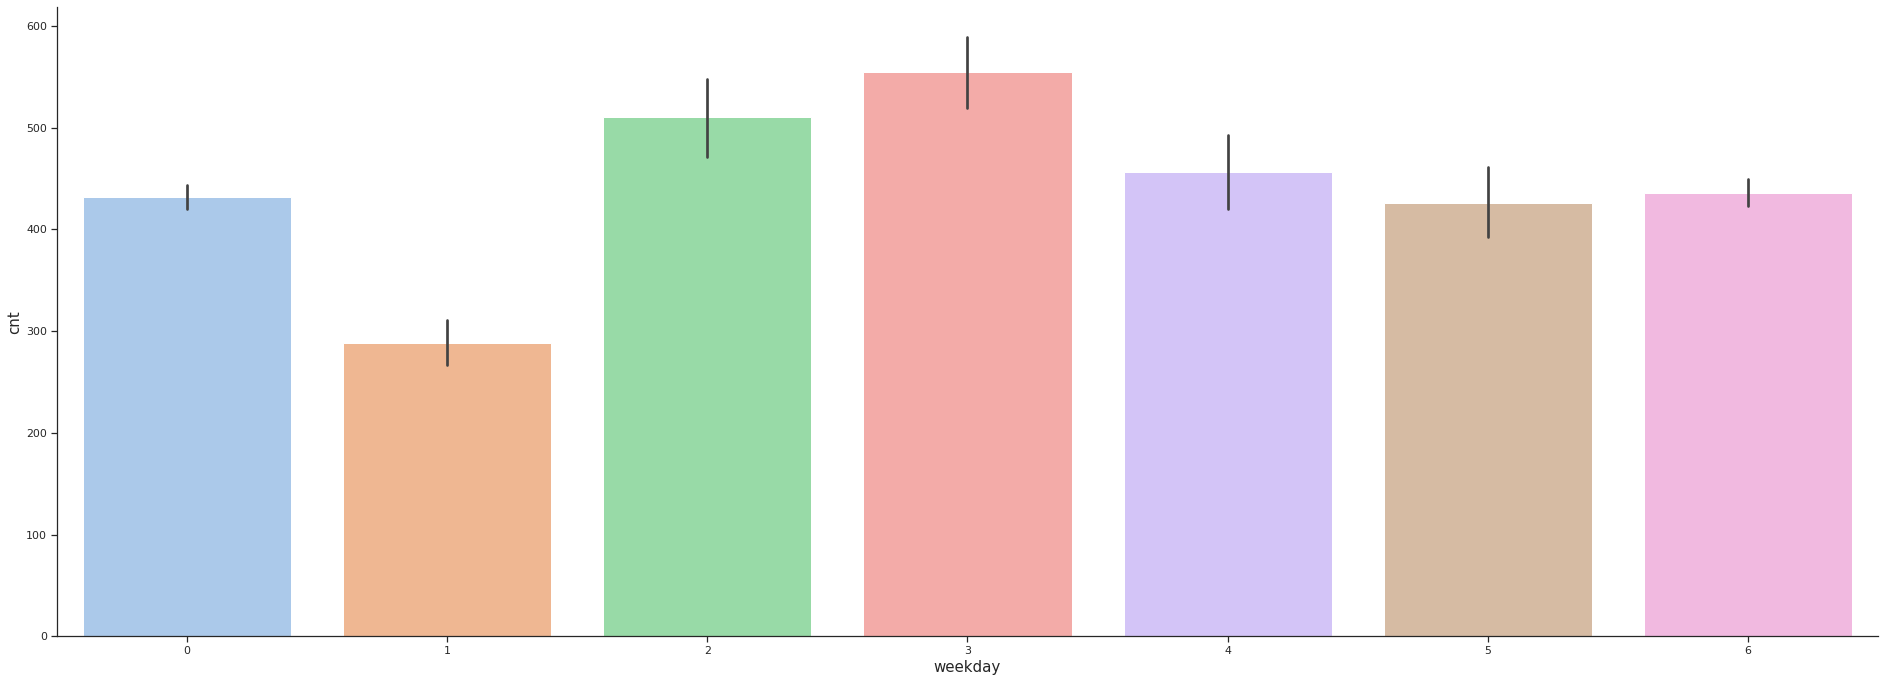

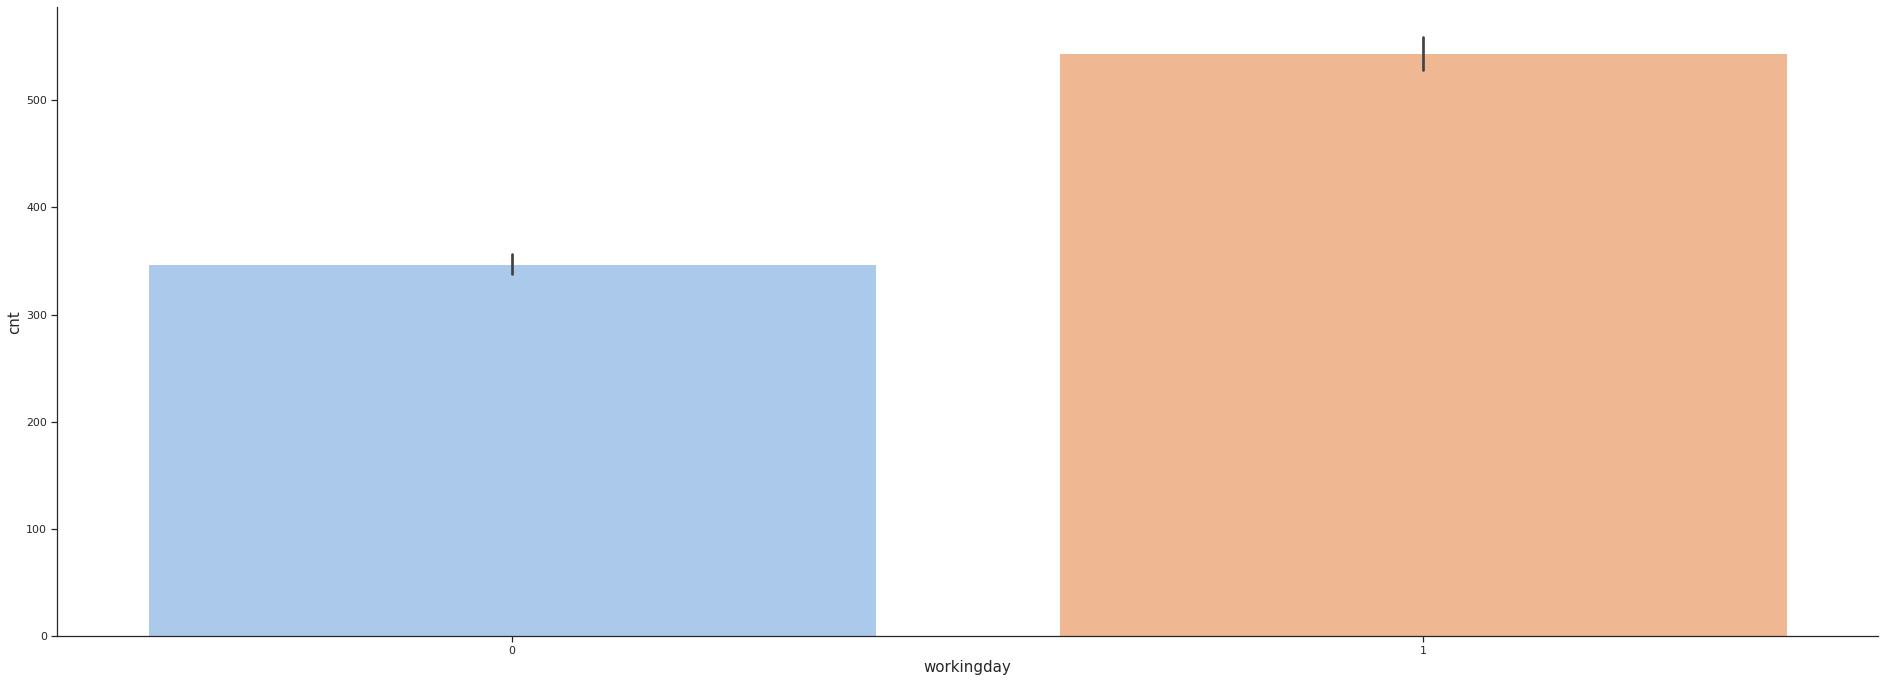

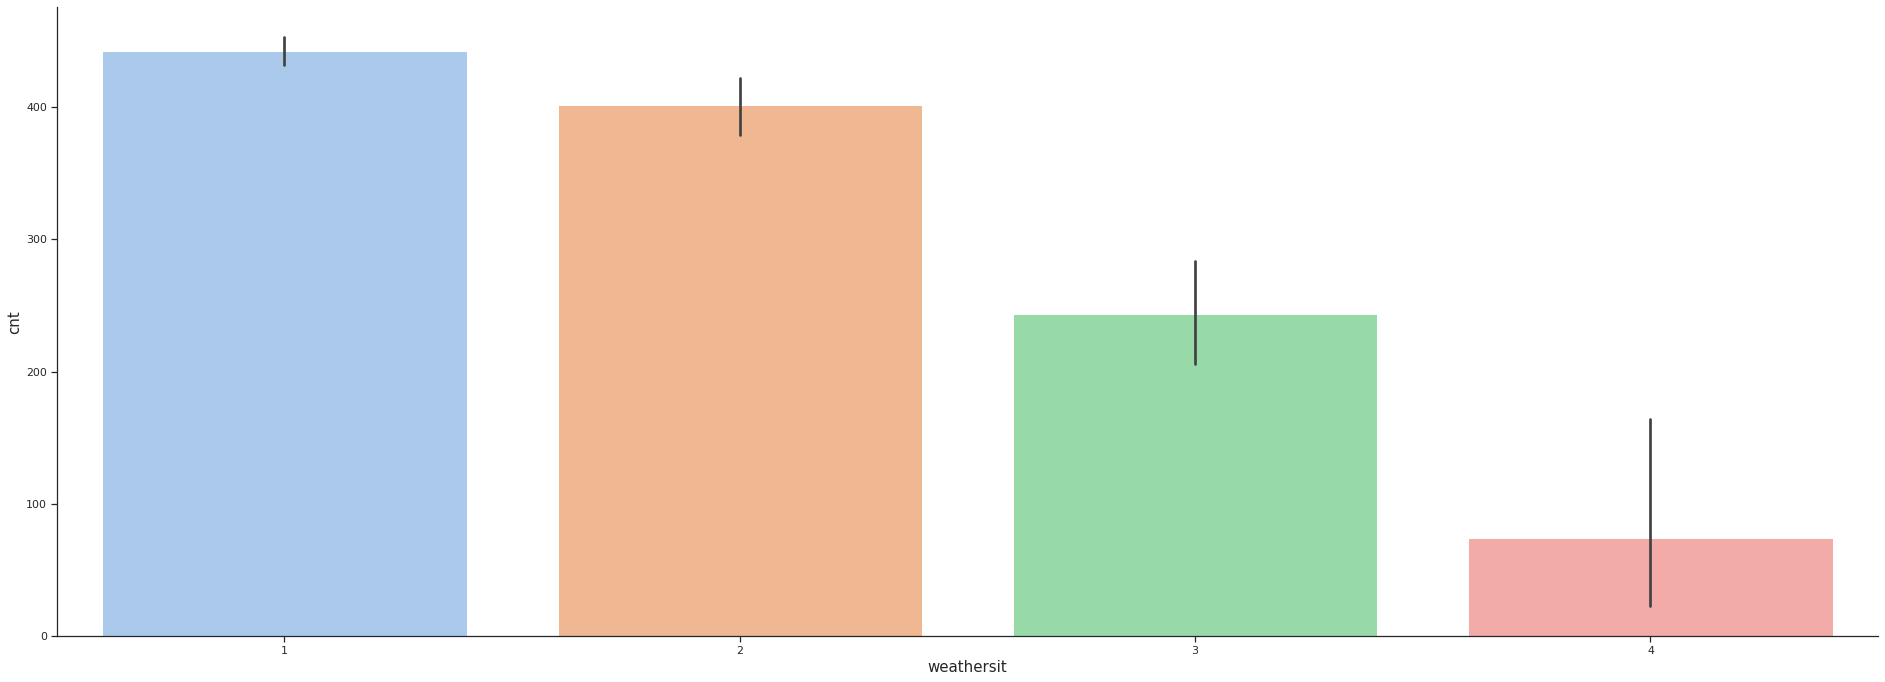

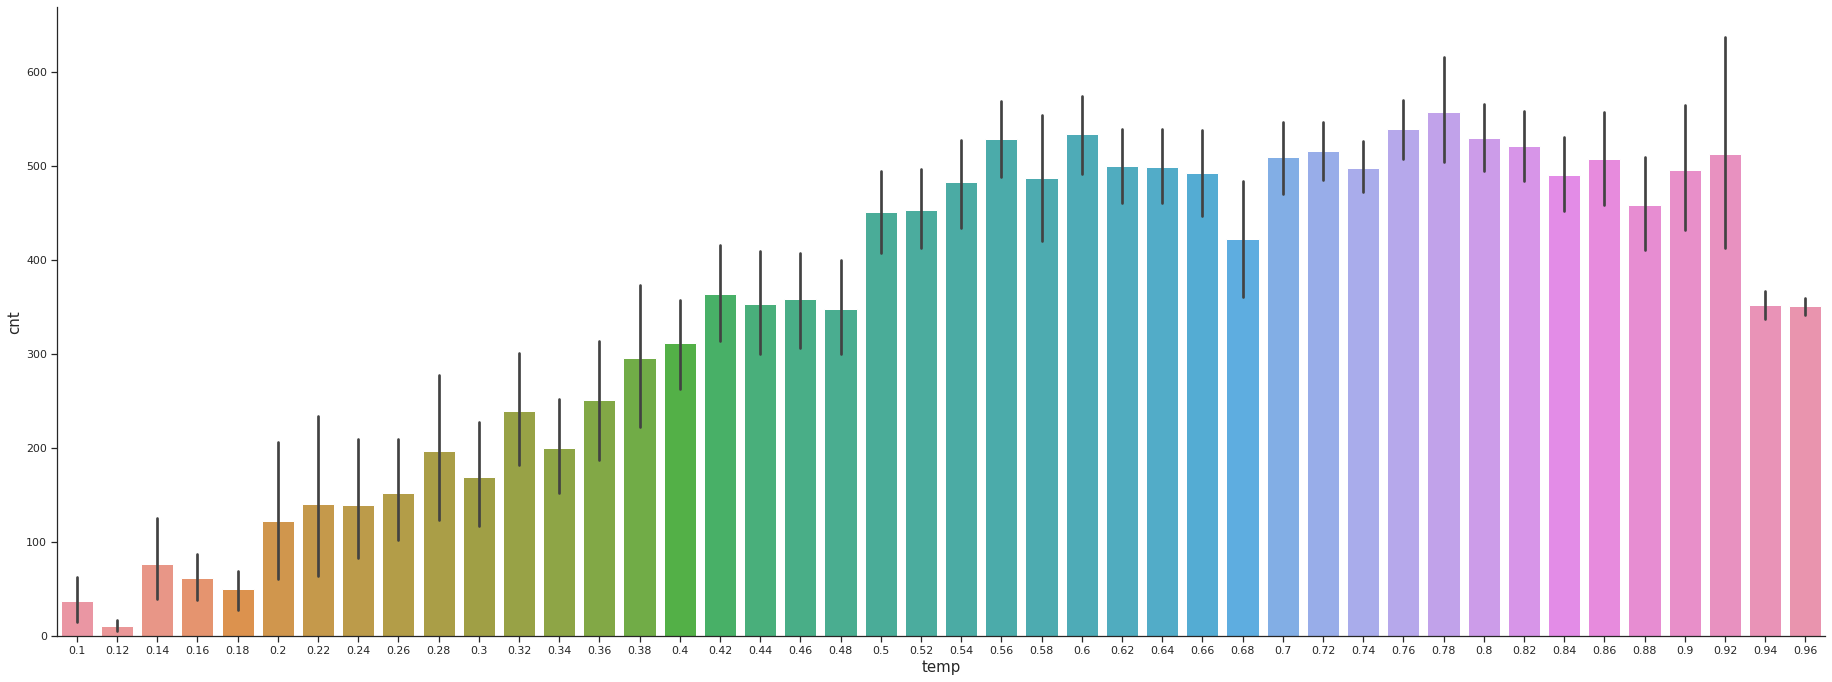

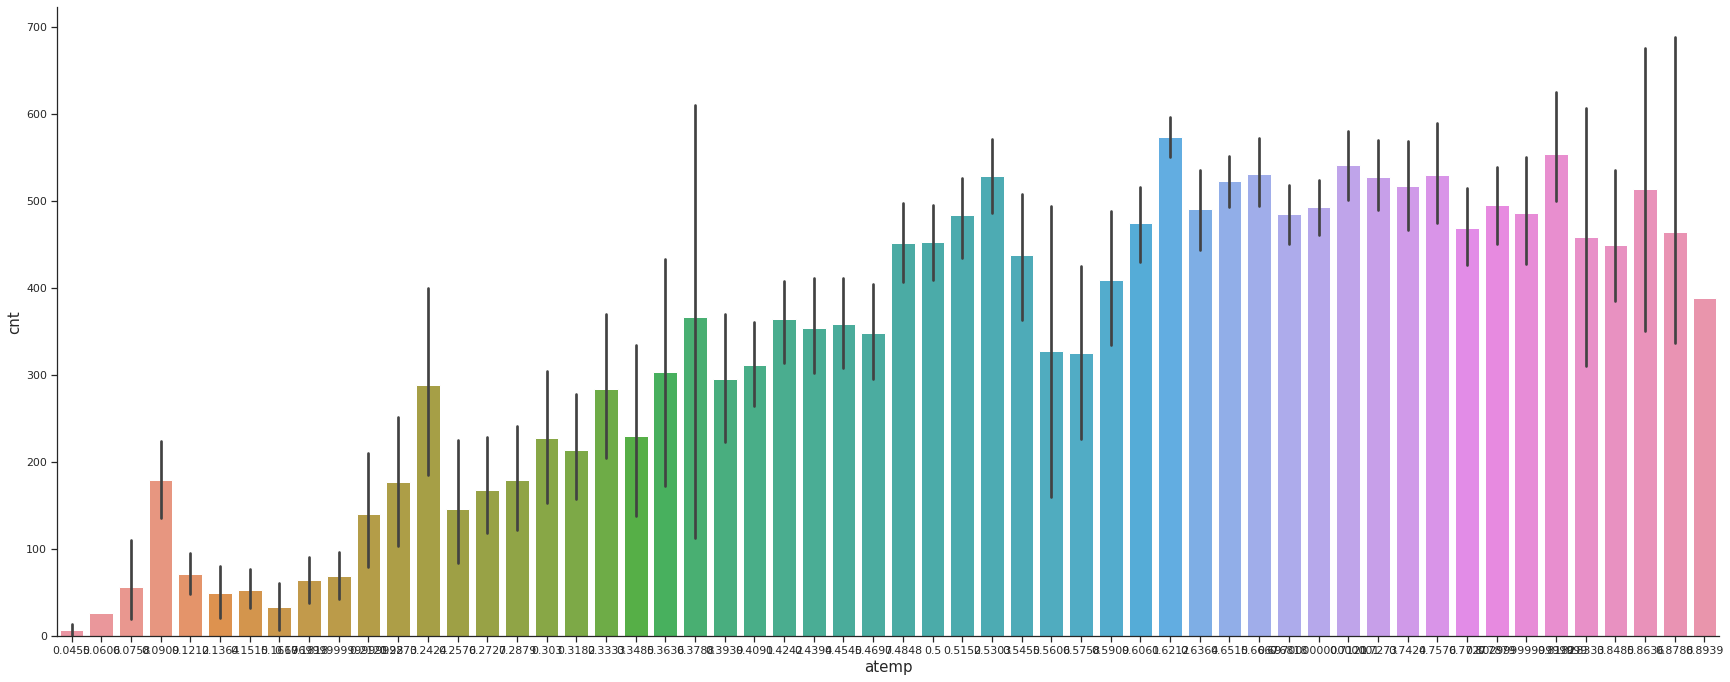

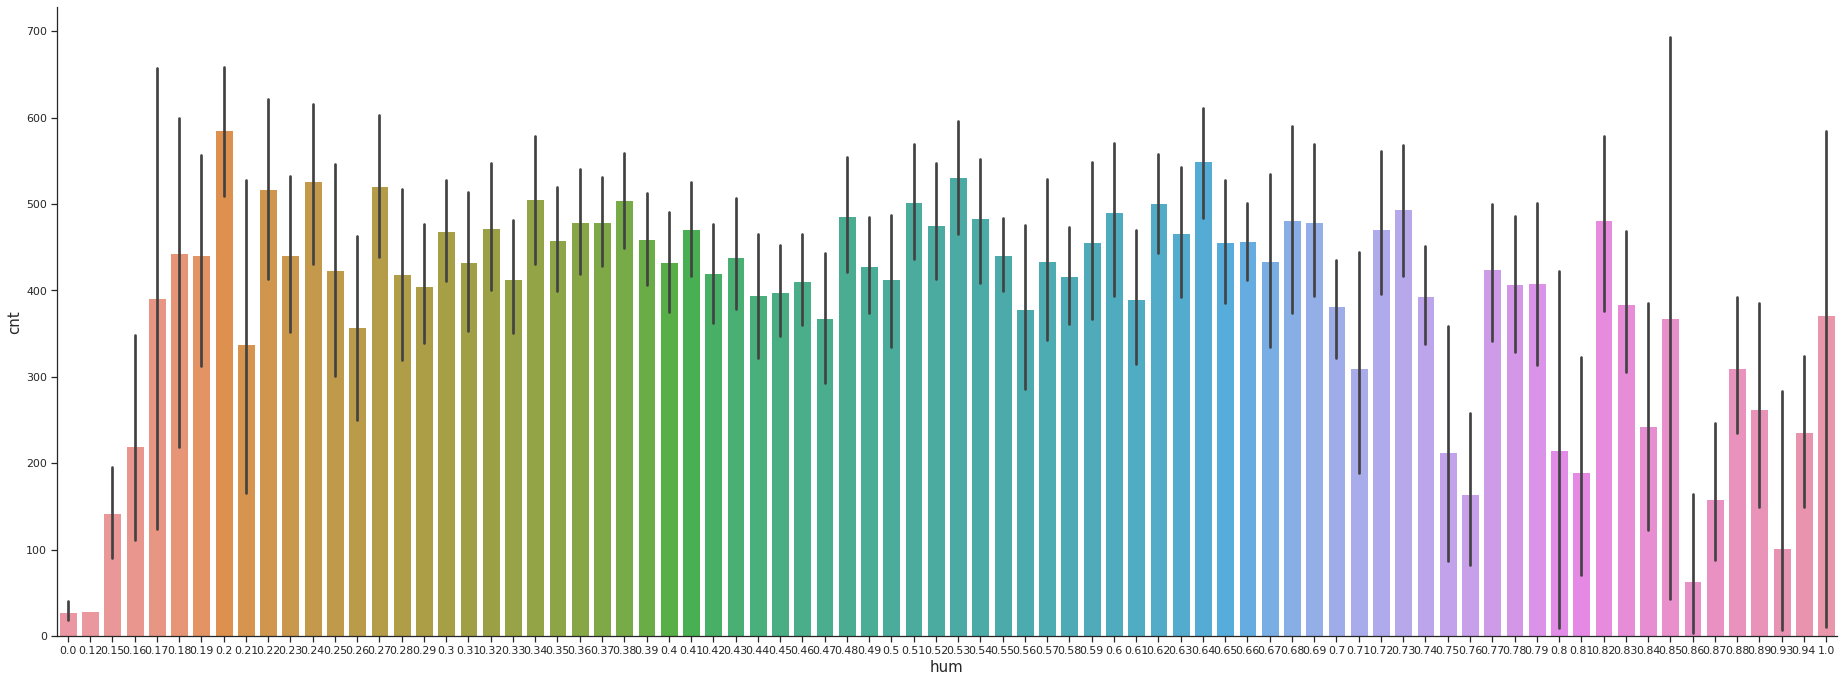

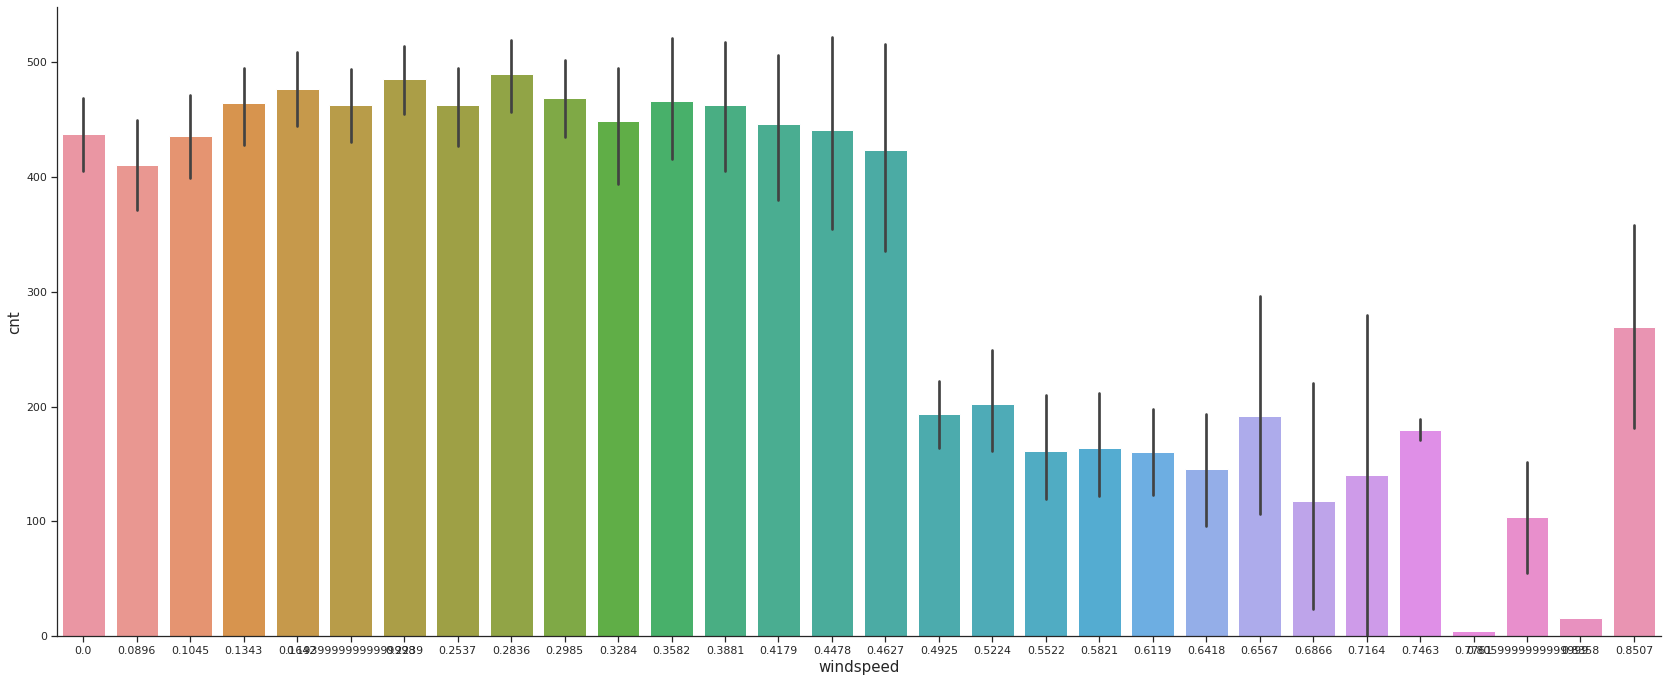

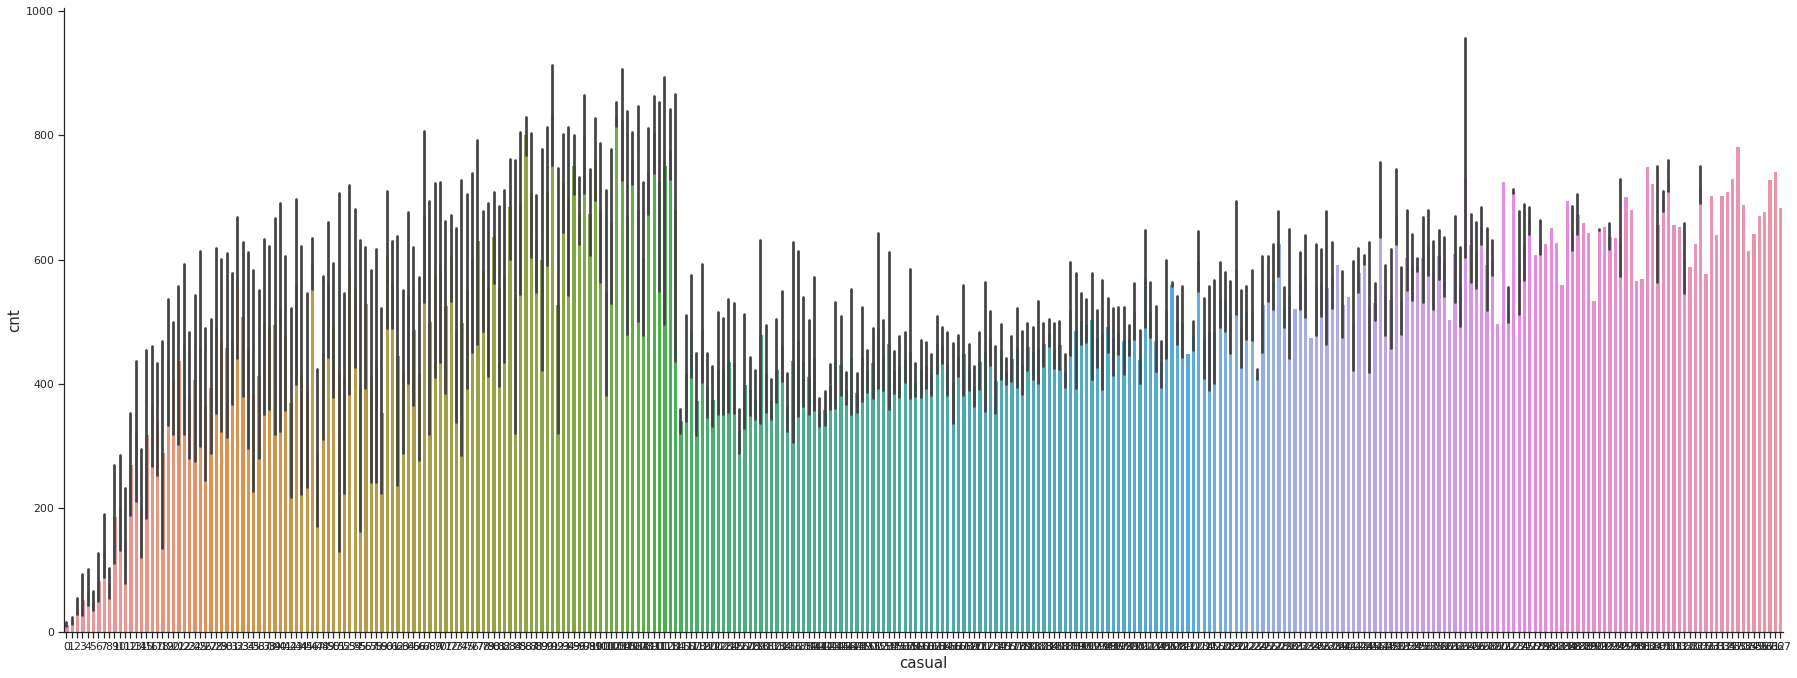

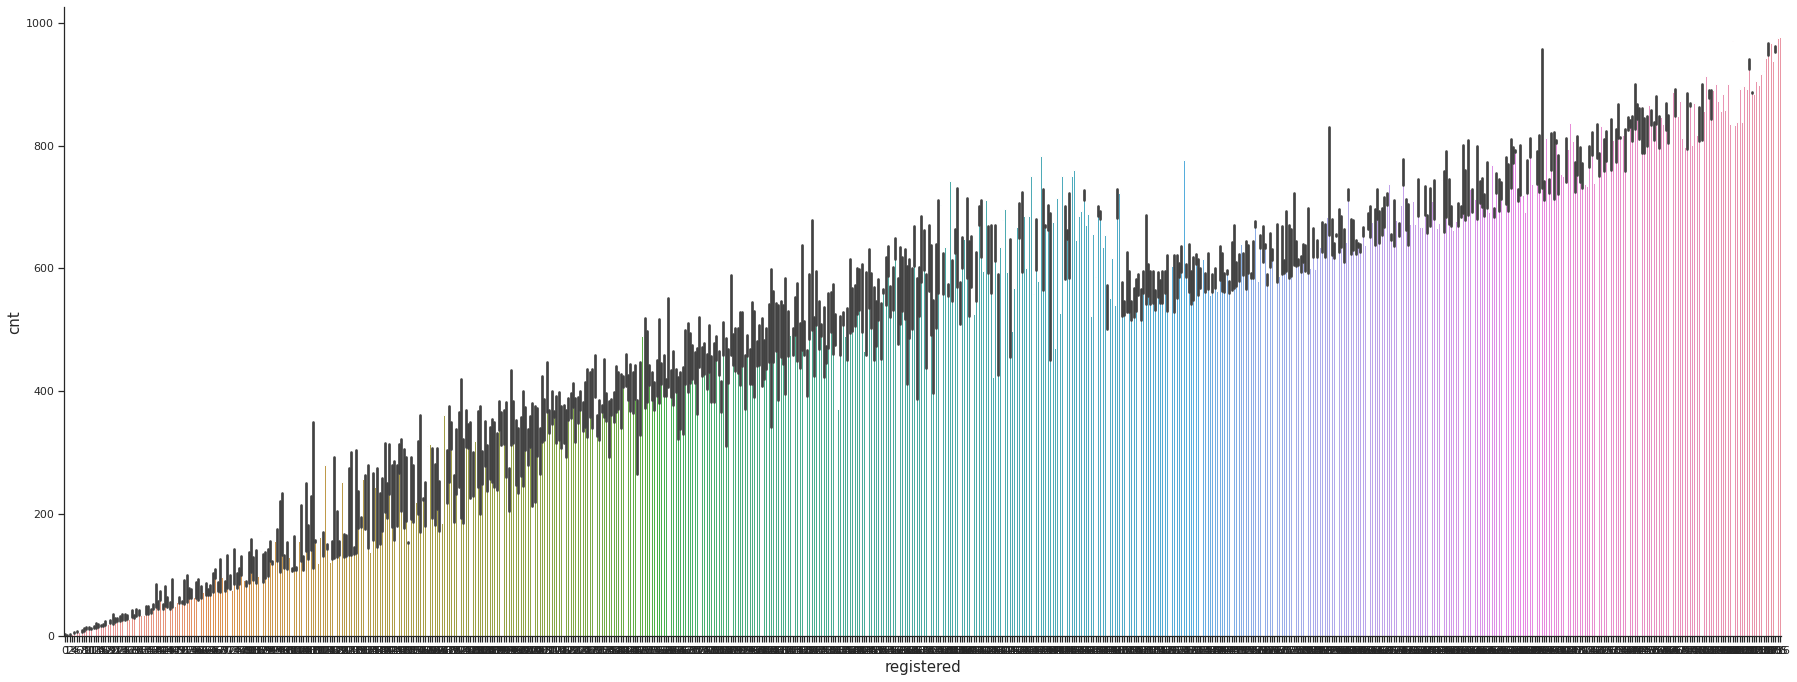

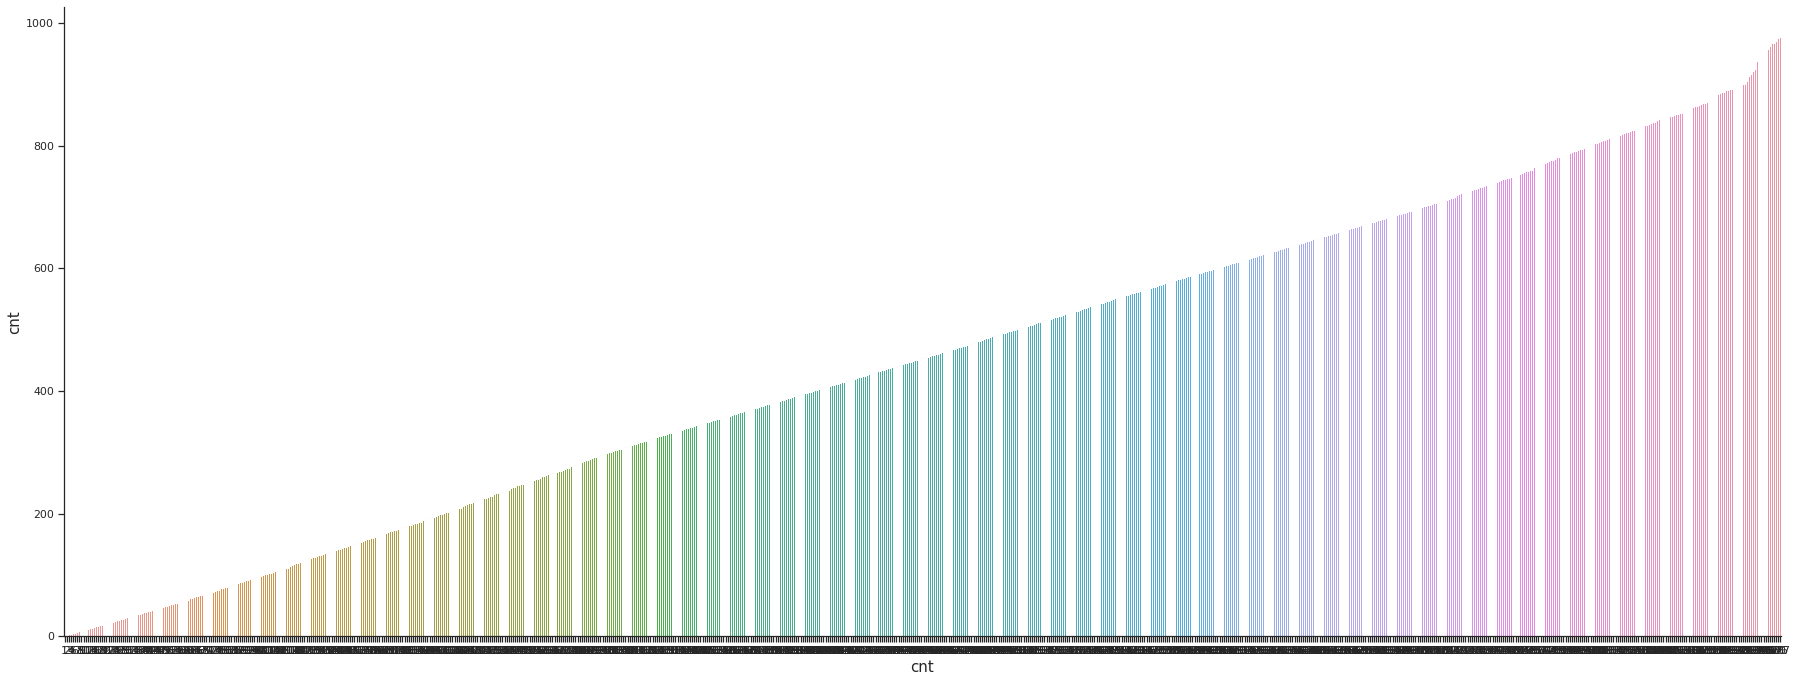

In [17]:
for i in df.columns:
    sns.catplot(
        data=outliers, kind="bar",
        x=i, y="cnt"
    )
    fig=plt.gcf()
    fig.set_size_inches(30,10)
    plt.rcParams["axes.labelsize"] = 15

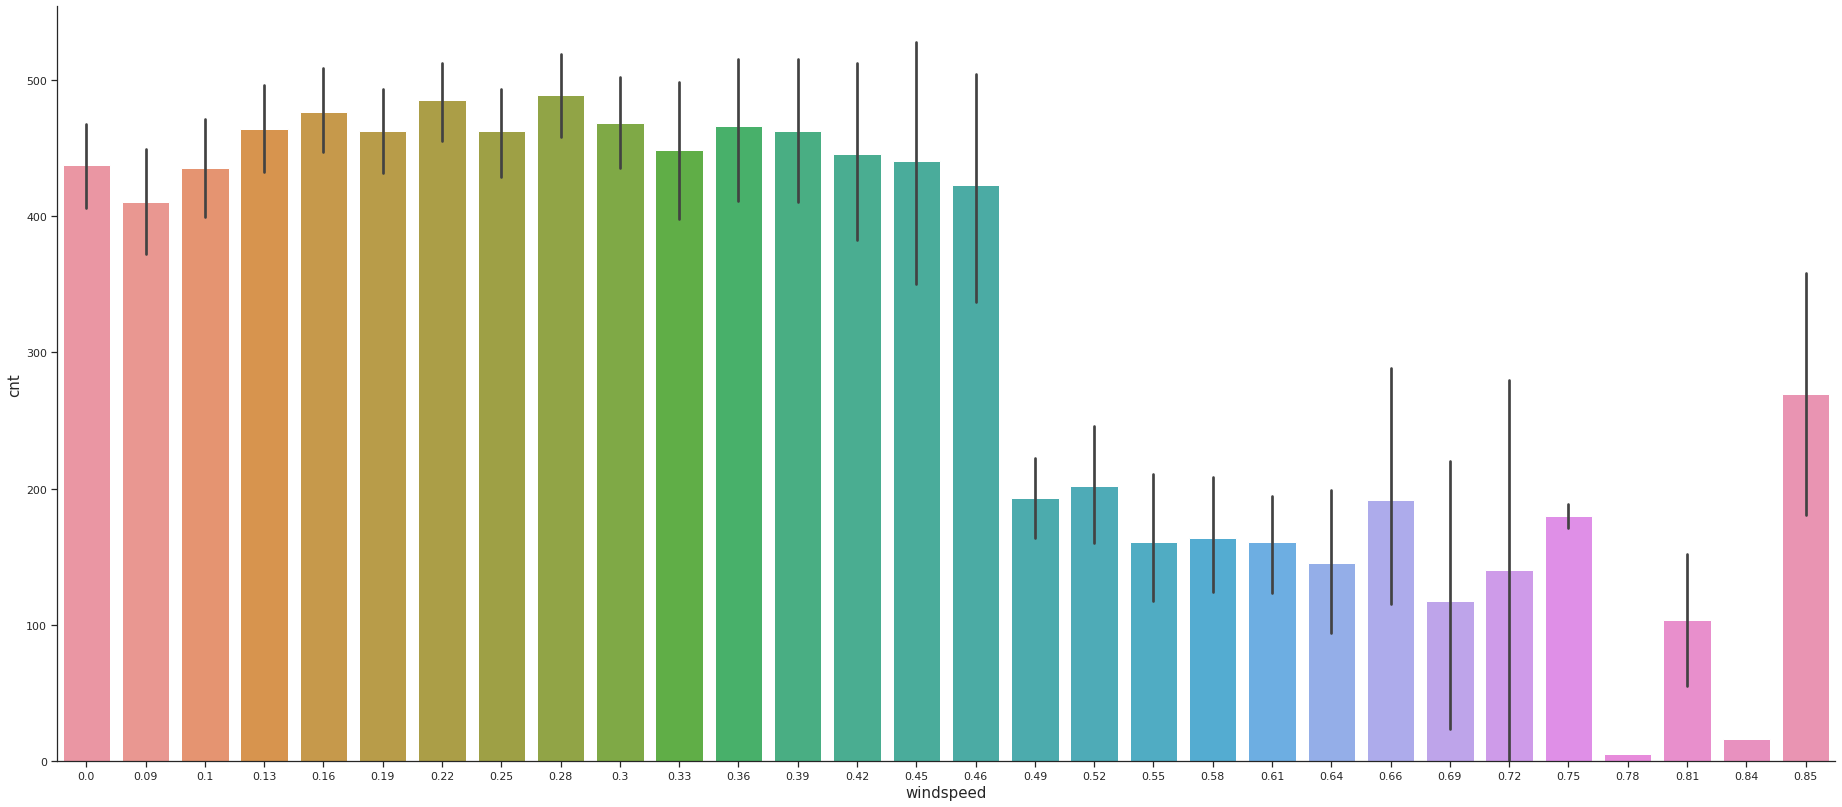

In [18]:
sns.catplot(
    data=np.round(outliers,2), kind="bar",
    x="windspeed", y="cnt"
)
fig=plt.gcf()
fig.set_size_inches(30,12)


In [19]:
df.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

Relacion entre cnt y demas columnas

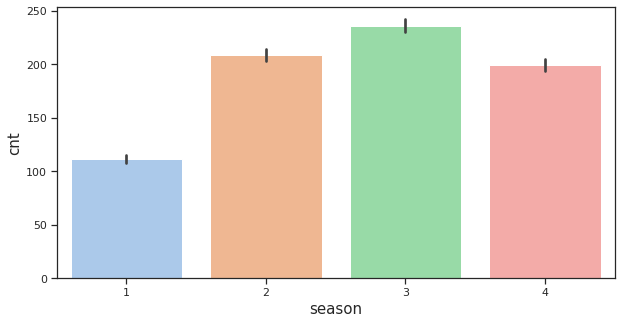

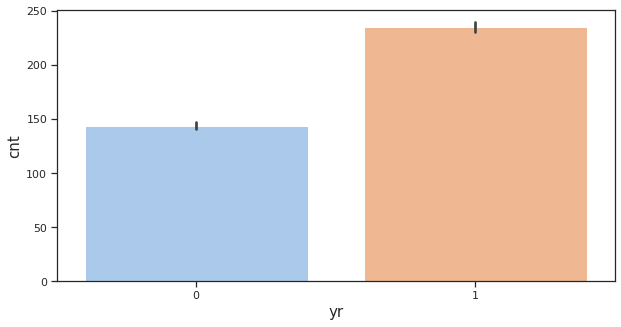

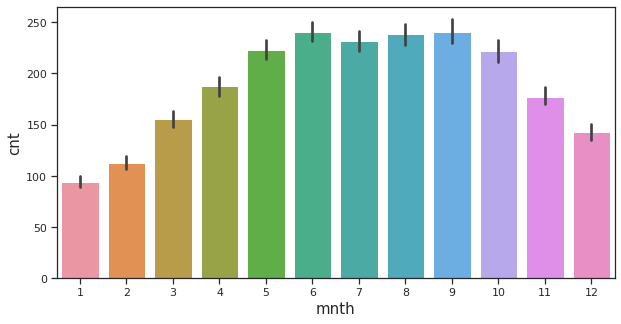

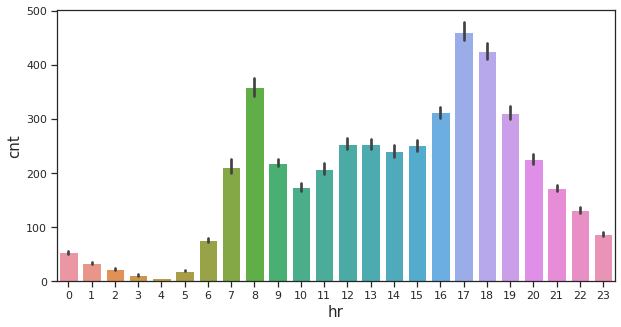

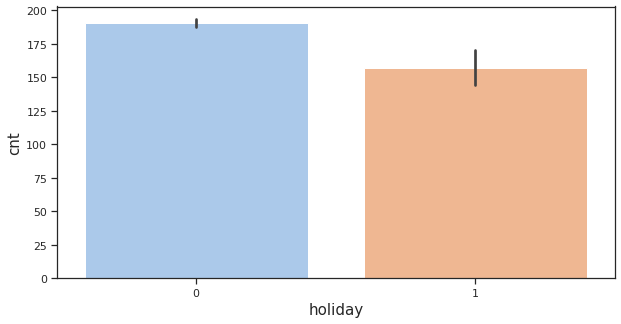

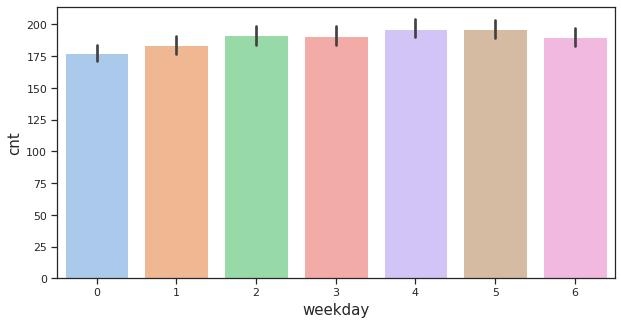

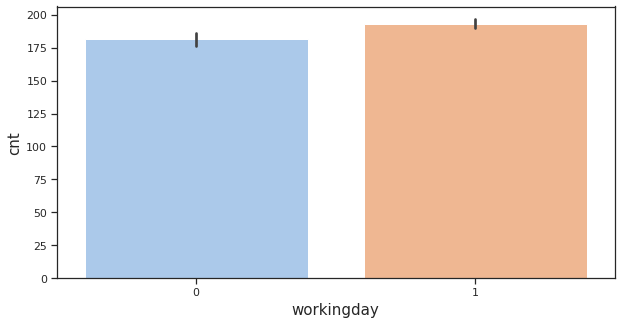

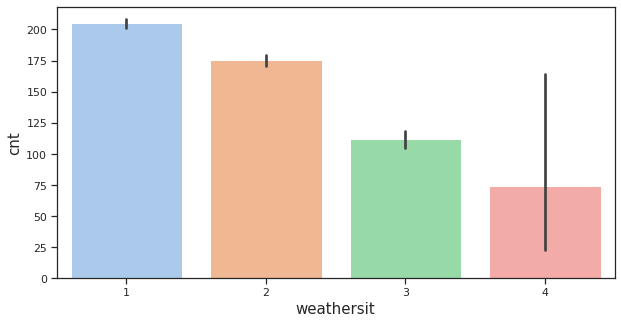

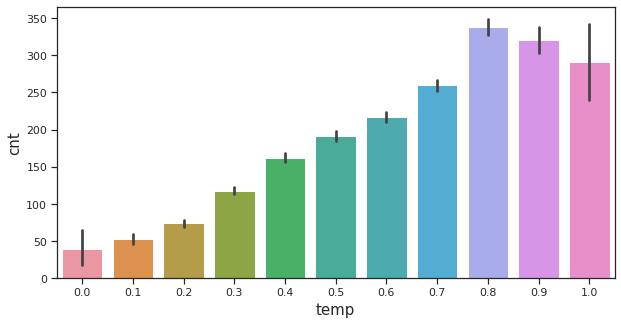

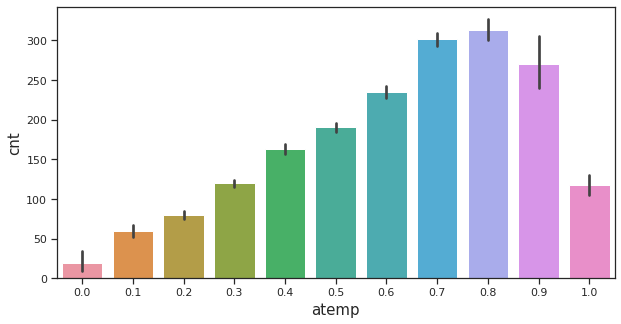

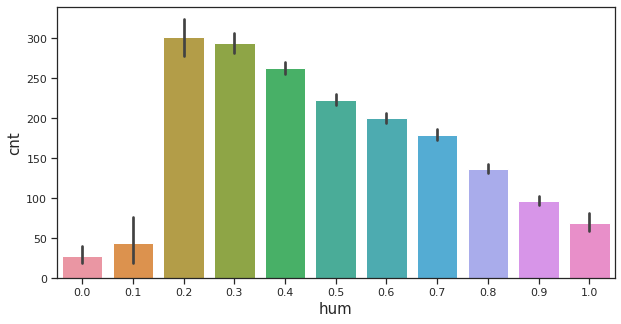

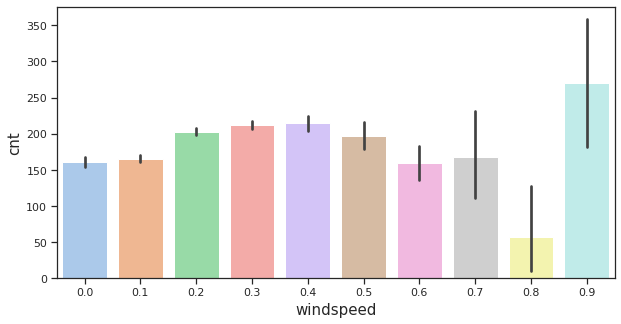

In [20]:
for i in df.columns[:-3]:
    fig, ax = plt.subplots(figsize=(10, 5))
    ax = sns.barplot(x=np.round(df[i],1), y=df.cnt, data=df)
    plt.show()

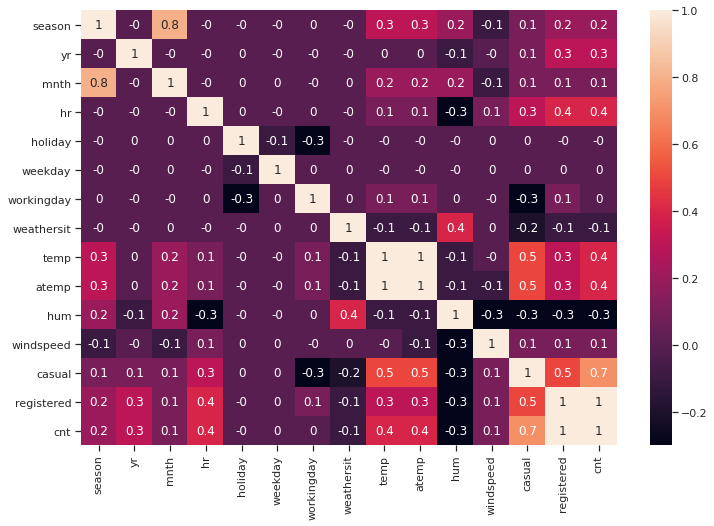

In [21]:
#Heatmap de todos contra todos
fig, ax = plt.subplots(figsize=(12,8))   
heat=df.corr()
sns.heatmap(np.round(heat,1),annot=True)

In [22]:
df2=df.drop(['atemp','season','casual','registered'],axis=1)
df2.head()

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,
1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
2,0,1,1,0,6,0,1,0.22,0.80,0.0,40
3,0,1,2,0,6,0,1,0.22,0.80,0.0,32
4,0,1,3,0,6,0,1,0.24,0.75,0.0,13
5,0,1,4,0,6,0,1,0.24,0.75,0.0,1


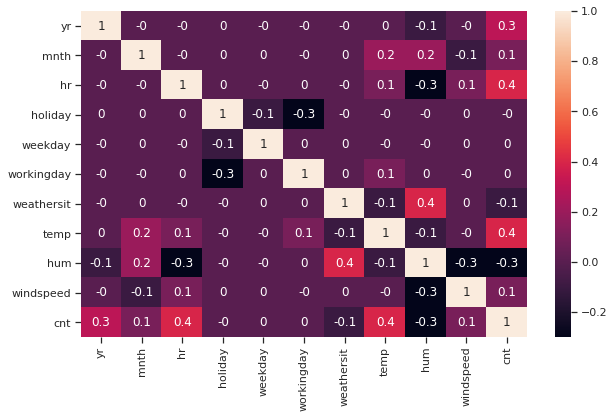

In [23]:
#heatmap nuevo
fig, ax = plt.subplots(figsize=(10,6))   
heat=df2.corr()
sns.heatmap(np.round(heat,1),annot=True)

In [24]:
#Corr relation para holiday, weekday, working day para multicorrelacion

q=df[[ 'holiday', 'weekday', 'workingday']]
q.corr()

,holiday,weekday,workingday
holiday,1.000000,-0.102088,-0.252471
weekday,-0.102088,1.000000,0.035955
workingday,-0.252471,0.035955,1.000000


In [25]:
pd.crosstab(df.holiday, df.workingday)

workingday,0,1
holiday,,
0,5014,11865
1,500,0


In [26]:
pd.crosstab(df.holiday, df.weekday)

weekday,0,1,2,3,4,5,6
holiday,,,,,,,
0,2502,2122,2430,2451,2423,2439,2512
1,0,357,23,24,48,48,0


In [27]:
pd.crosstab(df.workingday, df.weekday)

weekday,0,1,2,3,4,5,6
workingday,,,,,,,
0,2502,357,23,24,48,48,2512
1,0,2122,2430,2451,2423,2439,0


In [28]:
df2[(df2['holiday']==0) & (df2['workingday']==1)]

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,
48,0,1,0,0,1,1,1,0.22,0.44,0.3582,5
49,0,1,1,0,1,1,1,0.20,0.44,0.4179,2
50,0,1,4,0,1,1,1,0.16,0.47,0.3881,1
51,0,1,5,0,1,1,1,0.16,0.47,0.2836,3
52,0,1,6,0,1,1,1,0.14,0.50,0.3881,30
...,...,...,...,...,...,...,...,...,...,...,...
17375,1,12,19,0,1,1,2,0.26,0.60,0.1642,119
17376,1,12,20,0,1,1,2,0.26,0.60,0.1642,89
17377,1,12,21,0,1,1,1,0.26,0.60,0.1642,90


In [29]:
df2[(df2['holiday']==1) & (df2['workingday']==1)]

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,


In [30]:
df2[(df2['holiday']==1) & (df2['workingday']==0)]

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,
373,0,1,0,1,1,0,2,0.20,0.47,0.2239,17
374,0,1,1,1,1,0,2,0.20,0.44,0.1940,16
375,0,1,2,1,1,0,2,0.18,0.43,0.2537,8
376,0,1,3,1,1,0,2,0.18,0.43,0.1940,2
377,0,1,4,1,1,0,2,0.18,0.43,0.1343,3
...,...,...,...,...,...,...,...,...,...,...,...
17231,1,12,19,1,2,0,2,0.32,0.66,0.2239,36
17232,1,12,20,1,2,0,2,0.32,0.66,0.2836,40
17233,1,12,21,1,2,0,2,0.30,0.65,0.1940,34


In [31]:
df2[(df2['holiday']==0) & (df2['workingday']==0)]

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,
1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16
2,0,1,1,0,6,0,1,0.22,0.80,0.0000,40
3,0,1,2,0,6,0,1,0.22,0.80,0.0000,32
4,0,1,3,0,6,0,1,0.24,0.75,0.0000,13
5,0,1,4,0,6,0,1,0.24,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...
17351,1,12,19,0,0,0,1,0.34,0.61,0.0000,102
17352,1,12,20,0,0,0,1,0.22,0.47,0.3284,72
17353,1,12,21,0,0,0,1,0.20,0.51,0.1642,47


In [32]:
df[df['holiday']==1]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
373,1,0,1,0,1,1,0,2,0.20,0.1970,0.47,0.2239,1,16,17
374,1,0,1,1,1,1,0,2,0.20,0.1970,0.44,0.1940,1,15,16
375,1,0,1,2,1,1,0,2,0.18,0.1667,0.43,0.2537,0,8,8
376,1,0,1,3,1,1,0,2,0.18,0.1818,0.43,0.1940,0,2,2
377,1,0,1,4,1,1,0,2,0.18,0.1970,0.43,0.1343,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17231,1,1,12,19,1,2,0,2,0.32,0.3030,0.66,0.2239,16,20,36
17232,1,1,12,20,1,2,0,2,0.32,0.3030,0.66,0.2836,11,29,40
17233,1,1,12,21,1,2,0,2,0.30,0.2879,0.65,0.1940,8,26,34


In [33]:
df[df['holiday']==0]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


(<matplotlib.axes._subplots.AxesSubplot at 0x7f59eb36ff10>, 6    2512
 0    2502
 Name: weekday, dtype: int64)

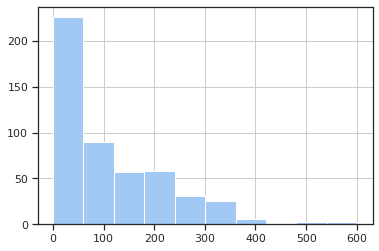

In [34]:
df[df['holiday']==1]['registered'].hist(),df2[(df2['holiday']==0) & (df2['workingday']==0)]['weekday'].value_counts()

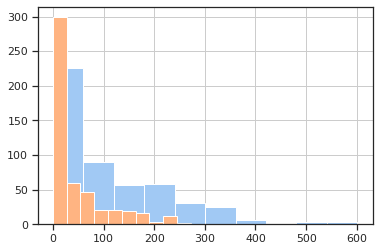

In [35]:
df[(df['holiday']==1) & (df['workingday']==0)]['registered'].hist()

df[(df['holiday']==1) & (df['workingday']==0)]['casual'].hist()

plt.show()

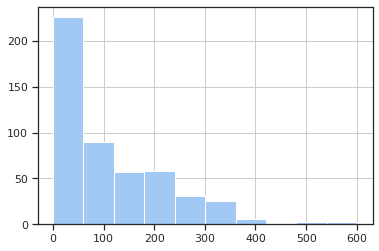

In [37]:
df[df['holiday']==1]['registered'].hist()

No se encontró una relación común entre las columnas de feriado, día laborable y día laborable. Ninguna de estas columnas se puede quitar.

In [38]:
df2.corr()['cnt']

yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
hum          -0.322911
windspeed     0.093234
cnt           1.000000
Name: cnt, dtype: float64

In [39]:
df.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [40]:
X=df[['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'hum', 'windspeed']]
y=df.cnt

In [41]:
X.shape


(17379, 10)

In [42]:
X.columns

Index(['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed'],
      dtype='object')

Construcción de modelos con regresión lineal y regresión polinomial.

In [45]:

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
import sklearn.metrics as metrics

In [46]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print('r2:',r2_score(y_test,y_pred_lr)*100)
print('mse',metrics.mean_squared_error(y_test, y_pred_lr))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

r2: 37.71666638194813
mse 20736.97661612449
rmse: 144.00339098828366


In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)
i=2
poly_reg = PolynomialFeatures(degree=i)
X_poly = poly_reg.fit_transform(X_train)
X_test1 = poly_reg.fit_transform(X_test)
prm = LinearRegression()
prm.fit(X_poly,y_train)
y_pred_prm = prm.predict(X_test1)
print(i,':','r2:',r2_score(y_test,y_pred_prm)*100)
print(i,':','mse',metrics.mean_squared_error(y_test, y_pred_prm))
print(i,':','rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_prm)))

2 : r2: 54.09147681995135
2 : mse 15285.051656091095
2 : rmse: 123.63272890335752


In [50]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)
i=3
poly_reg = PolynomialFeatures(degree=i)
X_poly = poly_reg.fit_transform(X_train)
X_test1 = poly_reg.fit_transform(X_test)
prm = LinearRegression()
prm.fit(X_poly,y_train)
y_pred_prm = prm.predict(X_test1)
print(i,':','r2:',r2_score(y_test,y_pred_prm)*100)
print(i,':','mse',metrics.mean_squared_error(y_test, y_pred_prm))
print(i,':','rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_prm)))

3 : r2: 62.886022720555125
3 : mse 12356.944213919825
3 : rmse: 111.16179295927097


In [51]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)
i=4
poly_reg = PolynomialFeatures(degree=i)
X_poly = poly_reg.fit_transform(X_train)
X_test1 = poly_reg.fit_transform(X_test)
prm = LinearRegression()
prm.fit(X_poly,y_train)
y_pred_prm = prm.predict(X_test1)
print(i,':','r2:',r2_score(y_test,y_pred_prm)*100)
print(i,':','mse',metrics.mean_squared_error(y_test, y_pred_prm))
print(i,':','rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_prm)))

4 : r2: 63.863367834316165
4 : mse 12031.541227396443
4 : rmse: 109.68838237204724


Usando un Standard Scaler inicialmente para escalar dataframe X

In [52]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# transform data
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.fit_transform(X_test)


i=2
poly_reg = PolynomialFeatures(degree=i)
X_train1 = poly_reg.fit_transform(X_train1)
X_test1 = poly_reg.fit_transform(X_test1)



prm = LinearRegression()



prm.fit(X_train1,y_train)
y_pred_prm = prm.predict(X_test1)

print(i,':','r2:',r2_score(y_test,y_pred_prm)*100)
print(i,':','mse',metrics.mean_squared_error(y_test, y_pred_prm))
print(i,':','rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_prm)))

2 : r2: -99818471329663.64
2 : mse 3.323414444249759e+16
2 : rmse: 182302343.491513


Polynomial Regression with MinMaxScaler

In [53]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)



from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# transform data
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.fit_transform(X_test)


i=1
poly_reg = PolynomialFeatures(degree=i)
X_train1 = poly_reg.fit_transform(X_train1)
X_test1 = poly_reg.fit_transform(X_test1)



prm = LinearRegression()



prm.fit(X_train1,y_train)
y_pred_prm = prm.predict(X_test1)
print(i,':','r2:',r2_score(y_test,y_pred_prm)*100)
print(i,':','mse',metrics.mean_squared_error(y_test, y_pred_prm))
print(i,':','rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_prm)))

1 : r2: 37.685741553929034
1 : mse 20747.27290886024
1 : rmse: 144.03913672630867


In [54]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.15, random_state=5)



from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# transform data
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.fit_transform(X_test)


i=2
poly_reg = PolynomialFeatures(degree=i)
X_train1 = poly_reg.fit_transform(X_train1)
X_test1 = poly_reg.fit_transform(X_test1)



prm = LinearRegression()



prm.fit(X_train1,y_train)
y_pred_prm = prm.predict(X_test1)
print(i,':','r2:',r2_score(y_test,y_pred_prm)*100)
print(i,':','mse',metrics.mean_squared_error(y_test, y_pred_prm))
print(i,':','rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_prm)))

2 : r2: 52.780610313387314
2 : mse 15928.45327942213
2 : rmse: 126.20797629081187


In [55]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)



from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# transform data
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.fit_transform(X_test)


i=3
poly_reg = PolynomialFeatures(degree=i)
X_train1 = poly_reg.fit_transform(X_train1)
X_test1 = poly_reg.fit_transform(X_test1)



prm = LinearRegression()



prm.fit(X_train1,y_train)
y_pred_prm = prm.predict(X_test1)
print(i,':','r2:',r2_score(y_test,y_pred_prm)*100)
print(i,':','mse',metrics.mean_squared_error(y_test, y_pred_prm))
print(i,':','rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_prm)))

3 : r2: 62.40916857557903
3 : mse 12515.710816143013
3 : rmse: 111.8736377174847


In [56]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)
i=4
poly_reg = PolynomialFeatures(degree=i)
X_poly = poly_reg.fit_transform(X_train)
X_test1 = poly_reg.fit_transform(X_test)
prm = LinearRegression()
prm.fit(X_poly,y_train)
y_pred_prm = prm.predict(X_test1)
print(i,':','r2:',r2_score(y_test,y_pred_prm)*100)
print(i,':','mse',metrics.mean_squared_error(y_test, y_pred_prm))
print(i,':','rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_prm)))

4 : r2: 63.863367834316165
4 : mse 12031.541227396443
4 : rmse: 109.68838237204724


#Encontrar el R2, RMSE y MSE óptimos 


In [57]:
y=df['cnt']
X=df[['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'hum', 'windspeed']]

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','KNeighborsRegressor']
rmse=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    test_pred=clf.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(test_pred,y_test)))
    print('Modelling Algo',model,'RMSE',rmse)
d={'Modelling Algo':model_names,'RMSE':rmse}   
d

Modelling Algo 0 RMSE [45.23730605605065]
Modelling Algo 1 RMSE [45.23730605605065, 103.27106920503194]
Modelling Algo 2 RMSE [45.23730605605065, 103.27106920503194, 47.84119491178623]
Modelling Algo 3 RMSE [45.23730605605065, 103.27106920503194, 47.84119491178623, 56.4275850895054]


{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'KNeighborsRegressor'],
 'RMSE': [45.23730605605065,
  103.27106920503194,
  47.84119491178623,
  56.4275850895054]}

#Random forest dio los valores mínimos de RMSE y se considerará para el ajuste de hiperparámetros

In [59]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)

rgr = RandomForestRegressor()

rgr.fit(X_train, y_train)
y_pred_rf = rgr.predict(X_test)
y_pred_rf_train =rgr.predict(X_train)


print('r2:',r2_score(y_test,y_pred_rf)*100)
print('mse',metrics.mean_squared_error(y_test, y_pred_rf))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))


r2: 93.8869163666212
mse 2035.3257443665198
rmse: 45.11458460815659


In [60]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
cv_result = cross_val_score(rgr, X_train,y_train,cv=10)
np.mean(cv_result)

0.935875325609089

Text(0.5, 0, 'Feature Importance Score')

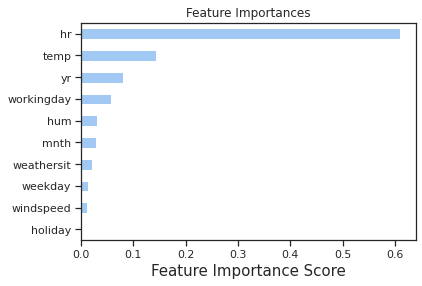

In [61]:
feature_imp = pd.Series(rgr.feature_importances_, X.columns).sort_values()
feature_imp.plot(kind='barh', title='Feature Importances')
plt.xlabel('Feature Importance Score')

In [62]:
y=df['cnt']
X=df[['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'hum', 'windspeed']]

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)



from sklearn.ensemble import RandomForestRegressor 
  

rf = RandomForestRegressor(n_estimators = 1000, random_state = 0) 

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

y_pred_rf_train =rf.predict(X_train)


print('r2:',r2_score(y_test,y_pred_rf)*100)
print('mse',metrics.mean_squared_error(y_test, y_pred_rf))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

r2: 93.93431843325597
mse 2019.5434236354329
rmse: 44.939330476047736


In [64]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [65]:
y=df['cnt']
X=df[['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'hum', 'windspeed']]

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)

import xgboost as xgb
from xgboost.sklearn import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print('r2:',r2_score(y_test,y_pred_xgb)*100)
print('mse',':',metrics.mean_squared_error(y_test, y_pred_xgb))
print('rmse',':',np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))

[05:48:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2: 85.93142539388236
mse : 4684.073341647657
rmse : 68.44029033871537


In [66]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
cv_result = cross_val_score(xgb, X_train,y_train,cv=10)
np.mean(cv_result)

[05:49:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:49:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:49:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:49:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:49:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:49:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:49:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:49:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

0.8415091922077756

Text(0.5, 0, 'Feature Importance Score')

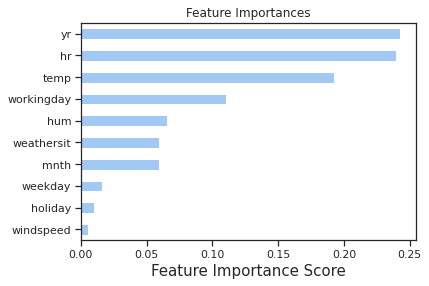

In [67]:
feature_imp = pd.Series(xgb.feature_importances_, X.columns).sort_values()
feature_imp.plot(kind='barh', title='Feature Importances')
plt.xlabel('Feature Importance Score')

In [68]:
for i in y_pred_xgb :
    if i <0 :        
        print(i)

-9.11635
-14.331791
-6.8225064
-8.222979
-1.4596925
-12.919125
-9.6343155
-3.1915221
-0.15300685
-19.537865
-41.886116
-10.389214
-2.0158405
-21.547644
-2.797459
-21.468683
-19.94391
-2.939098
-0.09050226
-9.41931
-5.141259
-27.110344
-17.093403
-6.8140454
-2.0107653
-8.016243
-1.94926
-12.310213
-5.533754
-25.184288
-31.325003
-4.538879
-2.1925344
-36.812626
-8.37953
-38.8508
-16.080317
-2.3954868
-9.351004
-0.29867804
-0.5949073
-29.777365
-13.395409
-6.073535
-10.743568
-4.7259555
-2.26701
-10.288549
-3.948379
-9.12733
-33.718285
-9.802977
-17.492983
-2.0218282
-2.9936004
-14.5523815
-25.418947
-15.078892
-12.901447
-38.51687
-36.372723
-7.873556
-8.071079
-10.666586
-3.787189
-28.244257
-6.415237
-2.0886772
-7.9419127
-8.202249
-5.446358
-0.7918551
-17.69997
-15.078892
-7.348058
-8.745514
-6.666844
-7.495624
-3.5918212
-8.912605
-7.061964
-2.9936004
-7.7515907
-5.1233325
-6.212787
-32.598526
-16.080317
-8.2745075
-4.172896
-10.651506
-9.9484
-39.442135
-59.843735
-8.598108
-0.24163

In [69]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

#Hyper Parameter tuning of Random Forest Regressor 

In [70]:
y=df['cnt']
X=df[['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'hum', 'windspeed']]

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=5)

# random grid busca el mejor hyperparameters
# Create the base model to tune
rf = RandomForestRegressor()
# Random search usando 3 fold cross validation, 
# Buscar en 100 combinaciones distintas
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2)
# Fit random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True, total=  43.3s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.3s remaining:    0.0s


[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True, total=  43.9s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True, total=  43.2s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True, total=  31.3s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True, total=  30.8s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True 
[CV]  n_estimators=1200, min

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 61.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [72]:
y=df['cnt']
X=df[['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'hum', 'windspeed']]

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.30, random_state=100)

rgr = RandomForestRegressor(n_estimators=944, min_samples_split=5, min_samples_leaf=1, max_features='auto', max_depth=10)

rgr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=944, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [73]:
y_pred_random = rgr.predict(X_test)

In [74]:
print('r2:',r2_score(y_test,y_pred_random)*100)
print('mse',metrics.mean_squared_error(y_test, y_pred_random))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_random)))

r2: 91.8801431711472
mse 2659.773923571752
rmse: 51.57299606937484


In [75]:
#Cross Validation Score
cv_result = cross_val_score(rgr, X_train , y_train ,cv=5)
np.mean(cv_result)

0.9123889572529981

#Casual Column rides prediccion

In [76]:
y=df['casual']
X=df[['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'hum', 'windspeed']]

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=100)

rgr = RandomForestRegressor(n_estimators=944, min_samples_split=5, min_samples_leaf=1, max_features='auto', max_depth=10)

rgr.fit(X_train, y_train)
y_pred_random = rgr.predict(X_test)
print('r2:',r2_score(y_test,y_pred_random)*100)
print('mse',metrics.mean_squared_error(y_test, y_pred_random))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_random)))

r2: 87.73668695475466
mse 271.6684079890309
rmse: 16.482366577316224


#Prediccion de Registered Column rides

In [77]:
y=df['registered']
X=df[['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'hum', 'windspeed']]

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=100)

rgr = RandomForestRegressor(n_estimators=944, min_samples_split=5, min_samples_leaf=1, max_features='auto', max_depth=10)

rgr.fit(X_train, y_train)
y_pred_random = rgr.predict(X_test)
print('r2:',r2_score(y_test,y_pred_random)*100)
print('mse',metrics.mean_squared_error(y_test, y_pred_random))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_random)))

r2: 92.81763919629786
mse 1663.7177332346353
rmse: 40.78869614531256
